In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, time, timezone,date

In [2]:
Past_df = pd.read_csv('Data/Housing_Zillow_Past.csv')

In [3]:
Past_df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName', '2000-01-31',
       ...
       '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30',
       '2023-10-31', '2023-11-30', '2023-12-31', '2024-01-31', '2024-02-29'],
      dtype='object', length=299)

In [4]:
Past_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26353 entries, 0 to 26352
Columns: 299 entries, RegionID to 2024-02-29
dtypes: float64(290), int64(3), object(6)
memory usage: 60.1+ MB


In [5]:
null_counts = Past_df.isnull().sum()
max_null_column = null_counts.idxmax()
max_null_count = null_counts[max_null_column]
print(max_null_count)
print(max_null_column)
average_null_counts = null_counts.mean()
print(average_null_counts)

13458
2000-01-31
6520.207357859532


In [6]:
Forecast_df=pd.read_csv('Data/Zillow_Housing_Forecast.csv')

In [7]:
Forecast_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,BaseDate,2024-03-31,2024-05-31,2025-02-28
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,2024-02-29,0.4,0.3,-0.1
1,61148,2,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,2024-02-29,0.5,1.4,-0.5
2,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,2024-02-29,0.4,0.5,-0.2
3,62080,4,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2024-02-29,0.2,0.5,-1.0
4,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,2024-02-29,0.3,0.3,-0.2


Is the average price of the home increasing or roughly staying the same? Group By State. 

In [8]:
Past_df.shape

(26353, 299)

In [9]:
Past_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,210077.000246,...,474580.751007,477700.023919,480490.175686,482965.054900,484784.135611,486023.522915,486713.787606,487327.752727,488702.818402,490863.655271
1,61148,2,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,137227.265500,...,539802.494668,545735.752680,551838.382379,557728.003874,564047.841208,571383.080659,578179.883051,582945.046770,584527.859569,587083.885915
2,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,103358.701090,...,275667.463240,276046.471281,276807.503132,277704.317637,278238.181709,278227.970902,277993.093814,277702.060665,278056.292900,278755.327431
3,62080,4,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,146558.052897,...,463122.443843,457780.560712,455976.188384,455970.300511,455418.562614,453412.439800,450092.281523,445849.486595,443049.463008,441461.718399
4,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,102016.821579,...,269425.329064,270023.265648,270866.796469,271740.075276,272168.214713,272158.564737,271738.097724,271316.067046,271361.964052,271885.730062


In [34]:
del Past_df['RegionID']

In [48]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName'], var_name='Date', value_name='MeanValue')
    melted['Date'] = pd.to_datetime(melted['Date'], format='%Y-%m-%d')
    melted = melted.dropna(subset=['MeanValue'])
    return melted


In [50]:
dfm = melt_data(Past_df)
dfm.head()

,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Date,MeanValue
0,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,2000-01-31,210077.000246
1,2,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,2000-01-31,137227.265500
2,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,103358.701090
3,4,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,146558.052897
4,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,102016.821579


In [66]:
New_Past_df = dfm.copy()
New_Past_df.head()
del New_Past_df['SizeRank']
del New_Past_df['RegionName']
del New_Past_df['RegionType']
del New_Past_df['StateName']
del New_Past_df['City']
del New_Past_df['Metro']
del New_Past_df['CountyName']
New_Past_df.head()

,State,Date,MeanValue
0,TX,2000-01-31,210077.000246
1,NJ,2000-01-31,137227.265500
2,TX,2000-01-31,103358.701090
3,NY,2000-01-31,146558.052897
4,TX,2000-01-31,102016.821579


In [73]:
State_Group_df = New_Past_df.groupby(['State', 'Date']).mean()
State_Group_df.head(100)

MeanValue
State Date                     
AK    2000-01-31  148256.912645
      2000-02-29  148840.359165
      2000-03-31  149208.589671
      2000-04-30  149763.796926
      2000-05-31  150073.663373
...                         ...
      2007-12-31  237135.346569
      2008-01-31  237760.499164
      2008-02-29  238114.408249
      2008-03-31  238299.844563
      2008-04-30  237778.569517

[100 rows x 1 columns]

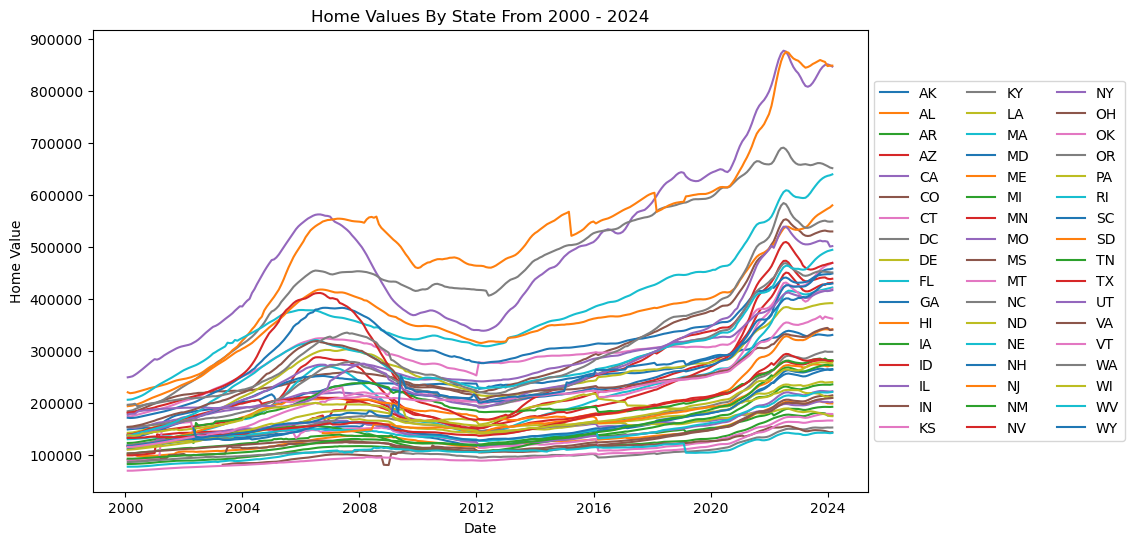

In [87]:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed

for state, group in State_Group_df.groupby(level='State'):
    dates = group.index.get_level_values('Date')  
    mean_values = group['MeanValue']  
    plt.plot(dates, mean_values, label=state)

plt.xlabel('Date')
plt.ylabel('Home Value')
plt.title('Home Values By State From 2000 - 2024')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)

plt.show()

In [93]:
# Convert the 'Date' index to a column and reset the index
State_Group_df.reset_index(inplace=True)

# Extract the year from the 'Date' column and assign it to a new column
State_Group_df['Year'] = pd.to_datetime(State_Group_df['Date']).dt.year

State_Group_df.head()
del State_Group_df['index']
State_Group_df.head()

,level_0,State,Date,MeanValue,Year
0,0,AK,2000-01-31,148256.912645,2000
1,1,AK,2000-02-29,148840.359165,2000
2,2,AK,2000-03-31,149208.589671,2000
3,3,AK,2000-04-30,149763.796926,2000
4,4,AK,2000-05-31,150073.663373,2000


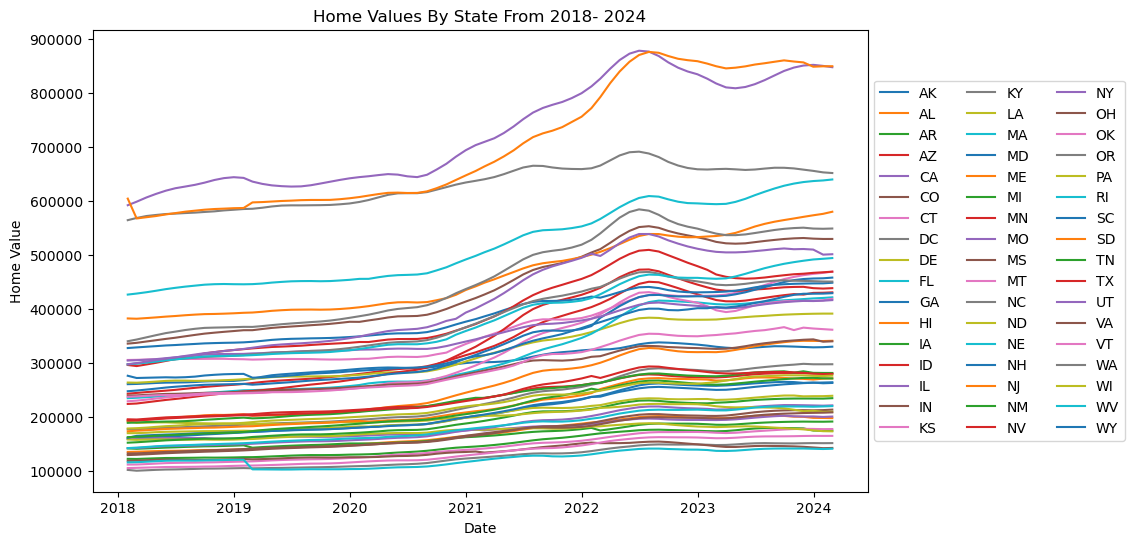

In [96]:
# Filter data for years 2020 to 2024
filtered_df = State_Group_df[(State_Group_df['Year'] >= 2018) & (State_Group_df['Year'] <= 2024)]

plt.figure(figsize=(10, 6))  # Adjust figure size if needed

for state, group in filtered_df.groupby('State'):
    dates = group['Date']  
    mean_values = group['MeanValue']  
    plt.plot(dates, mean_values, label=state)

plt.xlabel('Date')
plt.ylabel('Home Value')
plt.title('Home Values By State From 2018- 2024')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)

plt.show()

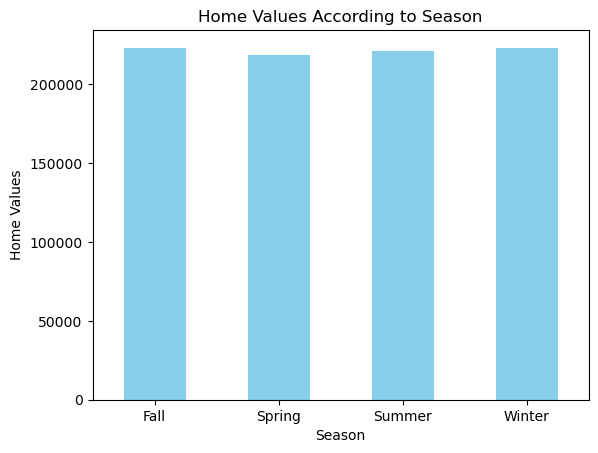

In [100]:
# Extract month from 'Date' column
State_Group_df['Month'] = State_Group_df['Date'].dt.month

# Define function to map month to season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Map month to season
State_Group_df['Season'] = State_Group_df['Month'].apply(get_season)

# Group by season and calculate average 'MeanValue'
seasonal_trend = State_Group_df.groupby('Season')['MeanValue'].mean()

# Plot seasonal trend
seasonal_trend.plot(kind='bar', color='skyblue')
plt.title('Home Values According to Season')
plt.xlabel('Season')
plt.ylabel('Home Values')
plt.xticks(rotation=0)
plt.show()

In [106]:
# Extract month from 'Date' column
State_Group_df['Month'] = State_Group_df['Date'].dt.month

# Group by month and calculate mean value
monthly_mean = State_Group_df.groupby('Month')['MeanValue'].mean()
monthly_mean.head()


Month
1    221825.839666
2    222275.194405
3    217589.879663
4    218377.022203
5    219528.756299
Name: MeanValue, dtype: float64

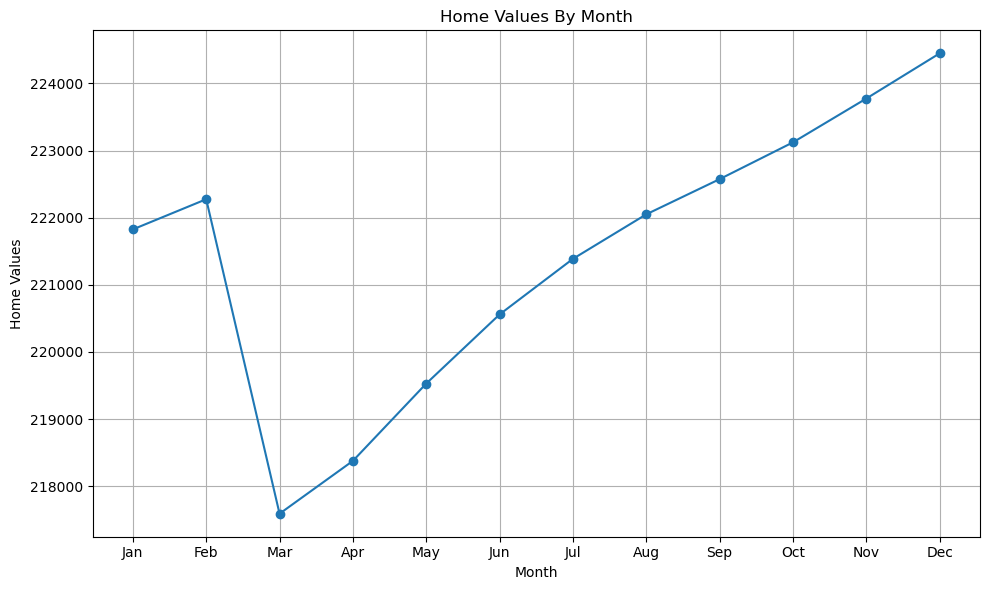

In [109]:
# Plotting the line graph for aggregated mean values over months
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(monthly_mean.index, monthly_mean.values, marker='o', linestyle='-')

# Adding labels and title
plt.title('Home Values By Month')
plt.xlabel('Month')
plt.ylabel('Home Values')

# Customize x-axis labels to show month names
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(monthly_mean.index, months)

# Display the plot
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [112]:
# Filter data for January 2021 and January 2024
filtered_data = State_Group_df[State_Group_df['Date'].dt.month == 1]
filtered_data = filtered_data[(filtered_data['Date'].dt.year == 2021) | (filtered_data['Date'].dt.year == 2024)]

# Pivot the data to have January 2021 and January 2024 values side by side
New_SG = filtered_data.pivot(index='State', columns='Year', values='MeanValue')
New_SG.head()

Year,2021,2024
State,,
AK,301647.646537,329440.025451
AL,166862.704662,198536.783288
AR,145690.431196,174947.332733
AZ,319864.003425,430115.434223
CA,703114.428575,849682.410512


In [117]:
percent_growth = round(100*((New_SG[2024] - New_SG[2021])/New_SG[2021]),2)

# Add percent growth to dataframe
New_SG["Growth"] = percent_growth
New_SG.head()

Year,2021,2024,Growth
State,,,
AK,301647.646537,329440.025451,9.21
AL,166862.704662,198536.783288,18.98
AR,145690.431196,174947.332733,20.08
AZ,319864.003425,430115.434223,34.47
CA,703114.428575,849682.410512,20.85


In [123]:
Dollar_Growth = (New_SG[2024] - New_SG[2021])

# Add percent growth to dataframe
New_SG["Value_Growth"] = Dollar_Growth
New_SG.head()

Year,2021,2024,Growth,Value_Growth
State,,,,
AK,301647.646537,329440.025451,9.21,27792.378914
AL,166862.704662,198536.783288,18.98,31674.078626
AR,145690.431196,174947.332733,20.08,29256.901536
AZ,319864.003425,430115.434223,34.47,110251.430798
CA,703114.428575,849682.410512,20.85,146567.981938


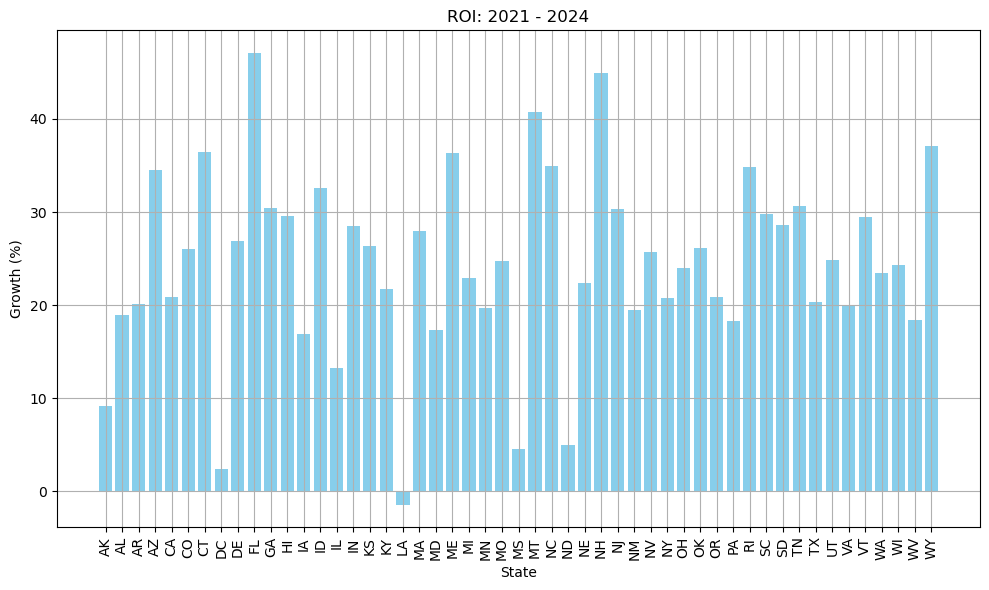

In [119]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(New_SG.index, New_SG['Growth'], color='skyblue')

# Adding labels and title
plt.title('ROI: 2021 - 2024')
plt.xlabel('State')
plt.ylabel('Growth (%)')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Display the plot
plt.grid(True)
plt.tight_layout()  
plt.show()

In [125]:
Sorted_SG = New_SG.sort_values(by='Value_Growth', ascending = False)
Sorted_SG

Year,2021,2024,Growth,Value_Growth
State,,,,
HI,655283.234572,848965.493750,29.56,193682.259178
CA,703114.428575,849682.410512,20.85,146567.981938
NH,315137.173717,456856.199507,44.97,141719.025790
MA,498299.362866,637829.039164,28.00,139529.676298
FL,285891.136232,420515.629447,47.09,134624.493215
NJ,441912.537601,576065.562205,30.36,134153.024604
RI,365697.591823,492944.319296,34.80,127246.727473
CT,342042.901161,466879.314286,36.50,124836.413126
MT,295601.047541,416080.500496,40.76,120479.452955


In [129]:
# Filter data for July 2022 and present
filtered_data = State_Group_df[(State_Group_df['Date'] >= '2022-07-01')]

# Check for and remove duplicate entries in the index
filtered_data = filtered_data[~filtered_data.index.duplicated(keep='first')]

# Aggregate duplicate values before pivoting (using mean as an example)
filtered_data = filtered_data.groupby(['State', 'Year']).agg({'MeanValue': np.mean}).reset_index()

# Pivot the data to have July 2022 and present values side by side
Newest_SG = filtered_data.pivot(index='State', columns='Year', values='MeanValue')
Newest_SG.head()

Year,2022,2023,2024
State,,,
AK,336652.758104,329734.055979,329896.518525
AL,200614.587327,200475.982975,198393.878952
AR,175952.261941,177397.467400,174977.147742
AZ,440500.150308,421173.885817,430484.713293
CA,853389.496968,827696.738346,848474.638678


In [133]:
Dollar_Growth = (Newest_SG[2024] - Newest_SG[2022])
percent_growth = round(100*((Newest_SG[2024] - Newest_SG[2022])/Newest_SG[2022]),2)

# Add value growth to dataframe
Newest_SG["Value_Growth"] = Dollar_Growth

# Add percent growth to dataframe
Newest_SG["Growth"] = percent_growth
Newest_SG.head()

Year,2022,2023,2024,Value_Growth,Growth
State,,,,,
AK,336652.758104,329734.055979,329896.518525,-6756.239579,-2.01
AL,200614.587327,200475.982975,198393.878952,-2220.708376,-1.11
AR,175952.261941,177397.467400,174977.147742,-975.114199,-0.55
AZ,440500.150308,421173.885817,430484.713293,-10015.437015,-2.27
CA,853389.496968,827696.738346,848474.638678,-4914.858290,-0.58


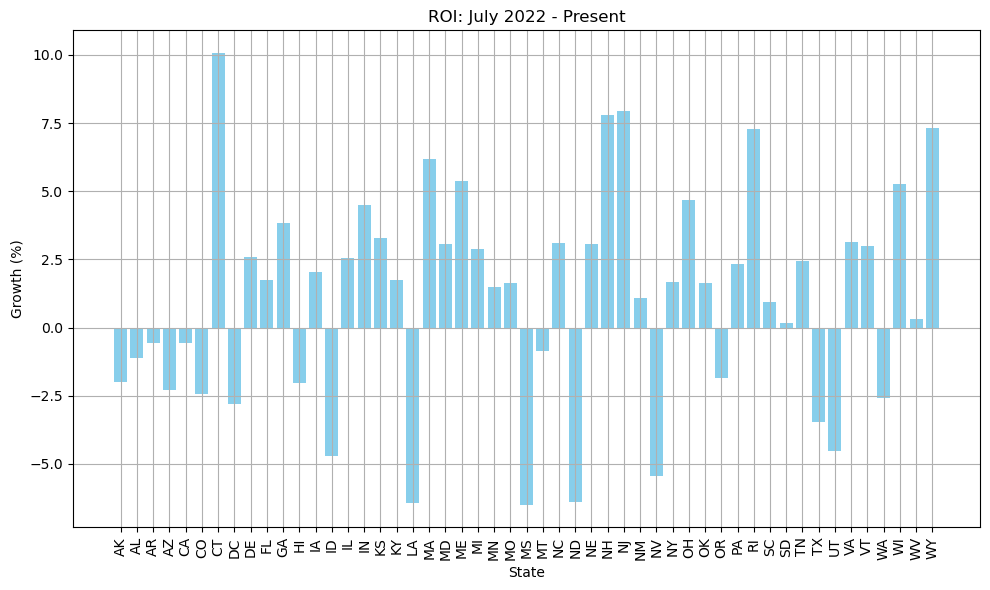

In [134]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(Newest_SG.index, Newest_SG['Growth'], color='skyblue')

# Adding labels and title
plt.title('ROI: July 2022 - Present')
plt.xlabel('State')
plt.ylabel('Growth (%)')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Display the plot
plt.grid(True)
plt.tight_layout()  
plt.show()

In [136]:
Sorted_Newest = Newest_SG.sort_values(by='Growth', ascending = False)
Sorted_Newest

Year,2022,2023,2024,Value_Growth,Growth
State,,,,,
CT,425195.867841,442970.251331,468017.714260,42821.846420,10.07
NJ,535484.269682,553454.052057,578007.834981,42523.565299,7.94
NH,424391.373888,438863.641268,457484.735511,33093.361623,7.80
WY,399626.053947,414124.504538,428919.834523,29293.780576,7.33
RI,460091.111216,472646.415286,493604.165221,33513.054005,7.28
MA,601591.718100,613918.963214,638718.080883,37126.362782,6.17
ME,323639.701597,331490.292283,341025.952374,17386.250777,5.37
WI,262635.678518,273026.455446,276463.358547,13827.680030,5.26
OH,199253.733429,202962.594802,208588.178003,9334.444574,4.68
